In [1]:
from pathlib import Path
import pandas as pd
import h5py

from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_and_parse_truefx(filepath):
    df = pd.read_csv(filepath, header=None, parse_dates=True)
    df.columns = ('asset', 'timestamp', 'bid', 'ask')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df.drop('asset', axis=1).set_index('timestamp')

In [3]:
def truefx_to_hdf(df, filepath, main_key):
    with h5py.File(filepath, 'w') as f:
        grp = f.create_group(main_key)
        for col in df.columns:
            grp.create_dataset(col, data=df[col])
        if isinstance(df.index, pd.DatetimeIndex):
            grp.create_dataset('timestamp', data=df.index.values.astype(np.uint64))
    
def truefx_to_hdf_midprice(df, filepath, main_key):
    with h5py.File(filepath, 'w') as f:
        grp = f.create_group(main_key)
        midprice = df[['ask', 'bid']].mean(axis=1)
#         f.create_dataset(main_key+'/'+'midprice', data=midprice)
        grp.create_dataset('midprice', data=midprice)
        if isinstance(df.index, pd.DatetimeIndex):
#             f.create_dataset(main_key+'/'+'timestamp', data=df.index.values.astype(np.uint64))
            grp.create_dataset('timestamp', data=df.index.values.astype(np.uint64))

In [4]:
def read_and_parse_hdf(filepath, main_key):
    df = pd.DataFrame()
    with h5py.File(filepath, 'r') as f:
        dset = f[main_key]
        for col in dset.keys():
            print(col)
            df[col] = dset[col][:]
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
    return df
        

In [8]:
from tqdm.notebook import tqdm

csvpath = Path("/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip")
hdfpath = Path("/media/hemu/Data/Markets/FX/working_data_aud_nzd.h5")
resample_timeframe = '5min'

files = list(csvpath.iterdir())
print(len(files))

df = []
for file in tqdm(files[:]):
    df.append(read_and_parse_truefx(file).resample(resample_timeframe).last().dropna())
df = pd.concat(df).sort_index()

print('len: ', len(df))
df

len:  751642


,bid,ask
timestamp,,
2009-05-01 00:00:00,1.28612,1.28698
2009-05-01 00:05:00,1.28591,1.28675
2009-05-01 00:10:00,1.28539,1.28604
2009-05-01 00:15:00,1.28569,1.28674
2009-05-01 00:20:00,1.28679,1.28779
...,...,...
2019-09-30 23:35:00,1.07799,1.07818
2019-09-30 23:40:00,1.07814,1.07830
2019-09-30 23:45:00,1.07810,1.07825


In [10]:
main_key = 'aud_nzd/10min'

truefx_to_hdf_midprice(df, hdfpath, main_key)
df = read_and_parse_hdf(hdfpath, main_key)
print(len(df))
df

midprice
timestamp
751642


,midprice
timestamp,
2009-05-01 00:00:00,1.286550
2009-05-01 00:05:00,1.286330
2009-05-01 00:10:00,1.285715
2009-05-01 00:15:00,1.286215
2009-05-01 00:20:00,1.287290
...,...
2019-09-30 23:35:00,1.078085
2019-09-30 23:40:00,1.078220
2019-09-30 23:45:00,1.078175


/home/hemu/miniconda3/envs/madigan/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


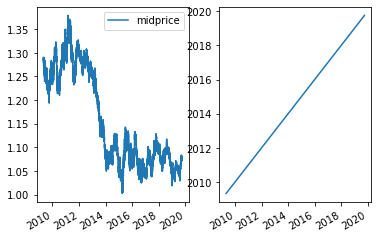

In [11]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].plot(df.sort_index()['midprice'], label='midprice')
ax[1].plot(df.index, df.index.values, label='time')
ax[0].legend()
fig.autofmt_xdate()

In [16]:
files

[PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2009-11.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2009-12.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-01.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-02.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-03.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-04.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-05.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-06.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-07.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-08.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-09.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/truefx/AUDNZD-zip/AUDNZD-2010-10.zip'),
 PosixPath('/media/hemu/Data/Markets/FX/

In [32]:
time_int = df.drop(df.index[536972]).index.values.astype(np.uint64)
np.where(np.diff(time_int) <= 0), len(time_int)

((array([], dtype=int64),), 597158)

In [49]:
np.where(df.sort_index()['midprice'].eq(df['midprice']).values != True)

(array([5734, 5735]),)

In [53]:
df.index.max()

Timestamp('2019-09-30 23:55:00')